# Домашнее задание №3

In [2]:
import numpy as np
from scipy.stats import t
from scipy.stats import norm
import matplotlib.pyplot as plt
from scipy import stats
import pandas as pd
import io
import requests
import seaborn as sns

%matplotlib inline

Таблица Indian liver pations records.

In [3]:
url = "http://yustiks.ru/dataset/indian_liver_patient.csv"
data = pd.read_csv(url)
data.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1


Columns:

*  Age of the patient
*  Gender of the patient
*  Total Bilirubin
*  Direct Bilirubin
*  Alkaline Phosphotase
*  Alamine Aminotransferase
*  Aspartate Aminotransferase
*  Total Protiens
*  Albumin
*  Albumin and Globulin Ratio
*  Dataset: field used to split the data into two sets (patient with liver disease, or no disease)


**1.** Построить одномерную линейную регрессию Direct_Bilirubin и Total_Bilirubin. Построить график. Строим прямую с помощью уравнения которое мы посчитали. Предсказать несколько элементов из таблицы с помощью метода predict() и сравнить с результатом табличным.

In [4]:
from sklearn.linear_model import LinearRegression
direct_bilirubin = data['Direct_Bilirubin']
total_bilirubin = data['Total_Bilirubin']
model = LinearRegression()
result = model.fit(np.array(direct_bilirubin).reshape(-1,1), total_bilirubin)

print('intercept:', model.intercept_)

print('slope:', model.coef_)

intercept: 0.4250270005942993
slope: [1.93375953]


Intercept - коэффициент b в уравнении прямой y=kx+b

slope - киэффициент k в уравнении прямой y=kx+b

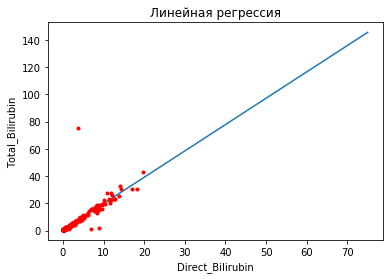

In [5]:
plt.xlabel('Direct_Bilirubin')
plt.ylabel('Total_Bilirubin')
plt.title('Линейная регрессия')
x = np.linspace(min(total_bilirubin), max(total_bilirubin), 100)
y = model.coef_*x + model.intercept_
plt.plot(x, y)
plt.plot(direct_bilirubin, total_bilirubin, 'r.')
plt.show()

In [7]:
print('2.0', model.predict(np.array([2.0]).reshape(-1, 1)))

2.0 [4.29254606]


Табличное значение 3,9

In [126]:
for i in range(5):
    print(i*10, model.predict(np.array([i*10]).reshape(-1, 1)))

0 [0.425027]
10 [19.76262232]
20 [39.10021764]
30 [58.43781297]
40 [77.77540829]


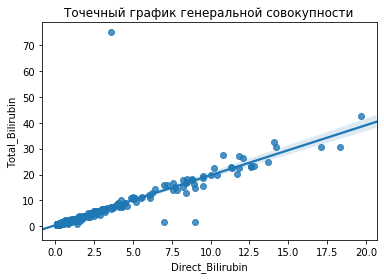

In [93]:
sns.regplot(x=direct_bilirubin, y=data['Total_Bilirubin'], data=data, fit_reg=True)
plt.xlabel('Direct_Bilirubin')
plt.ylabel('Total_Bilirubin')
plt.title('Точечный график генеральной совокупности')
plt.show()

**2.** Построить многомерную линейную регрессию для предсказания болезни (Dataset) от двух параметров. Параметры подобрать с помощью матрицы корреляций. Предсказать несколько значений из таблицы и сравнить результат модели от табличного значения.

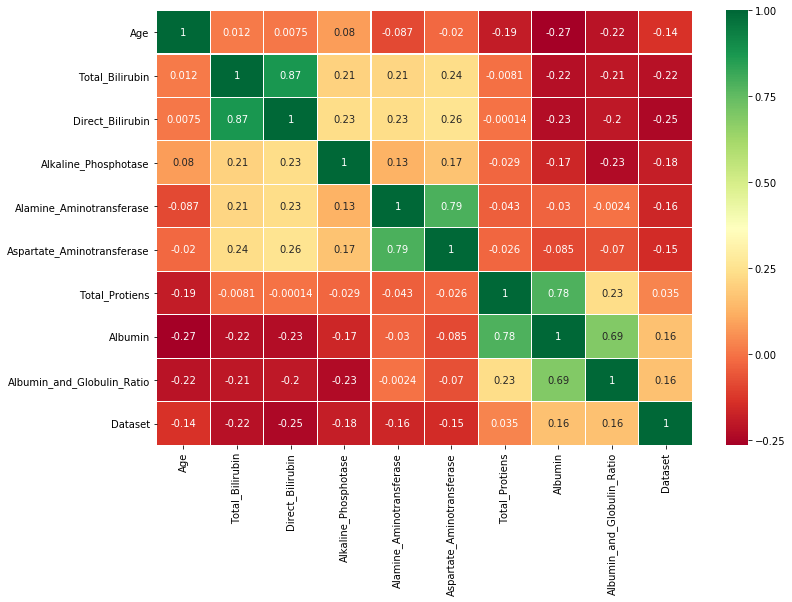

In [134]:
sns.heatmap(data.corr(),annot=True,cmap='RdYlGn',linewidths=0.2) #data.corr()-->correlation matrix
fig=plt.gcf()
fig.set_size_inches(12,8)
plt.show()

Возьмем параметры Direct_Bilirubin и Albumin

In [10]:
direct_bilirubin = data['Direct_Bilirubin']
albumin = data['Albumin']
dataset = data['Dataset']
x = np.vstack([np.array(direct_bilirubin), np.array(albumin)]).T
print('x - это двумерная матрица, где колонки - это Direct_Bilirubin и Albumin : ')
print(x[:3])
y = np.array(dataset)
model = LinearRegression().fit(x, y)

x - это двумерная матрица, где колонки - это Direct_Bilirubin и Albumin : 
[[0.1 3.3]
 [5.5 3.2]
 [4.1 3.3]]


In [11]:
print('intercept:', model.intercept_)
print('slope:', model.coef_)

intercept: 1.1410072153790838
slope: [-0.03555641  0.06311015]


**Вывод:** Показатели близки к нулю, поэтому сделать вывод достаточно сложно

**3.** Посчитать квартили для всех колонок. 

In [139]:
data.quantile([.25, .50, .75], axis = 0).T

,0.25,0.5,0.75
Age,33.0,45.00,58.0
Total_Bilirubin,0.8,1.00,2.6
Direct_Bilirubin,0.2,0.30,1.3
Alkaline_Phosphotase,175.5,208.00,298.0
Alamine_Aminotransferase,23.0,35.00,60.5
Aspartate_Aminotransferase,25.0,42.00,87.0
Total_Protiens,5.8,6.60,7.2
Albumin,2.6,3.10,3.8
Albumin_and_Globulin_Ratio,0.7,0.93,1.1
Dataset,1.0,1.00,2.0


**4.** Построить график histogram двух выборок по наличию или отсутствию болезни: люди, возрастом до 50 лет, и люди после 50 лет. Посчитать среднее значение и квартиль 0.5 в данных выборках. Чем они отличаются?

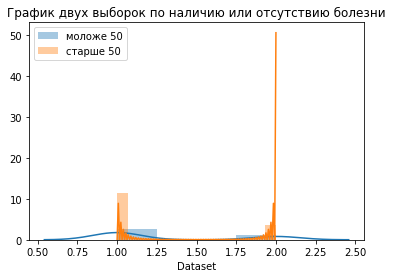

In [165]:
age_younger50 = data[data['Age']<50]['Dataset']
age_older50 = data[data['Age']>=50]['Dataset']
sns.distplot(age_younger50)
sns.distplot(age_older50)
plt.title('График двух выборок по наличию или отсутствию болезни')
plt.legend(['моложе 50', 'старше 50'])
plt.show()

In [173]:
print('Cреднее значение для людей моложе 50 лет:', round(age_younger50.mean(), 5))
print('Cреднее значение для людей старше 50 лет:', round(age_older50.mean(), 5))

Cреднее значение для людей моложе 50 лет: 1.31728
Cреднее значение для людей старше 50 лет: 1.23913


In [174]:
print('Квартиль 0.5 для людей моложе 50 лет:', age_younger50.quantile(.5))
print('Квартиль 0.5 для людей старше 50 лет:', age_older50.quantile(.5)) 

Квартиль 0.5 для людей моложе 50 лет: 1.0
Квартиль 0.5 для людей старше 50 лет: 1.0


**Вывод:** будем исходить из того, что для данных Dataset, указанных в столбце 1 - здоровый, 2 - больной. Так как распределение по Dataset дискретное, то среднее значение больше 1 для людей и моложе, и старше 50 лет означает, что все они болеют. Квартили 0,5 равные 1 для обеих групп, говорят о том, что в этих группах здоровых больше, чем больных.


**5.** Посчитать критерий одновыборочный t-критерий для выборки по критерию Total_Bilirubin у больных людей. Как показатель помогает понять, что выборки не похожа на генеральную совокупность?

In [17]:
total_bilirubin_ill = data[data['Dataset']==2]['Total_Bilirubin']
stats.ttest_1samp(total_bilirubin_ill, data['Total_Bilirubin'].mean())

Ttest_1sampResult(statistic=-27.741265868012505, pvalue=3.180002804533163e-64)

**Вывод:** так как значение pvalue около нуля, то выборки не похожа на генеральную совокупность.

**6.** Посчитать критерий t для двух выборок: больные и здоровые (по критерию Total_Bilirubin). Имеют ли данные группы схожесть?

In [20]:
total_bilirubin_ill = data[data['Dataset']==2]['Total_Bilirubin']
total_bilirubin_well = data[data['Dataset']==1]['Total_Bilirubin']

stats.ttest_ind(total_bilirubin_ill, total_bilirubin_well)

Ttest_indResult(statistic=-5.441441126834863, pvalue=7.801430929364345e-08)

**Вывод:** так как значение pvalue около нуля, то каждая из выборок не похожа на генеральную совокупность.

**7.** Посчитать статистическую значимость для трех выборок (по возрасту) - 1ая группа от 1 до 30 лет, 2ая группа от 30 лет до 55, 3я группа более 55 по выборке Dataset. Сравнить с реальностью (они логично что будут отличаться).

In [41]:
data_set_all = data['Dataset']
data_set_less30 = data[data['Age']<=30]['Dataset']
data_set_30to55 = data[(data['Age']>30) & (data['Age']<=55)]['Dataset']
data_set_more55 = data[data['Age']>55]['Dataset']

In [50]:
print('Для группы до 30 лет:      ', stats.ttest_ind(data_set_less30, data_set_all))
print('Для группы от 30 до 55 лет:', stats.ttest_ind(data_set_30to55, data_set_all))
print('Для группы от 55 лет:      ', stats.ttest_ind(data_set_more55, data_set_all))

Для группы до 30 лет:       Ttest_indResult(statistic=3.342539253974424, pvalue=0.0008745725534777619)
Для группы от 30 до 55 лет: Ttest_indResult(statistic=-1.4247732938165167, pvalue=0.15457290734990078)
Для группы от 55 лет:       Ttest_indResult(statistic=-0.6681469375057845, pvalue=0.504248422550763)


**Вывод:** только группа с возрастом до 30 лет имеет значение pvalue меньше 5%. По остальным двум выборкам можно сделать вывод, что они имеют статистическую значимость.